<a href="https://colab.research.google.com/github/wayaadhyasta/Prediksi-Nilai-Tukar-Rupiah-terhadap-Dolar-AS-Menggunakan-Machine-Learning/blob/main/Code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pandas scikit-learn matplotlib

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = yf.download("USDIDR=X", start = "2010-01-01", end = "2023-10-01")
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,USDIDR=X,USDIDR=X,USDIDR=X,USDIDR=X,USDIDR=X
Date,,,,,
2010-01-01,9385.599609,9427.200195,9378.099609,9427.200195,0
2010-01-04,9364.200195,9469.900391,9240.000000,9434.799805,0
2010-01-05,9305.200195,9382.700195,9200.000000,9362.500000,0
2010-01-06,9218.099609,9354.700195,9153.000000,9303.500000,0
2010-01-07,9272.500000,9280.599609,9135.000000,9217.200195,0
...,...,...,...,...,...
2023-09-25,15368.000000,15415.200195,15352.000000,15368.000000,0
2023-09-26,15405.000000,15507.000000,15395.599609,15405.000000,0


In [ ]:
data = data[['Close']].dropna()
data.rename(columns={'Close': 'USDIDR'}, inplace=True)

In [ ]:
for i in range(1, 6):
    data[f'lag_{i}'] = data['USDIDR'].shift(i)

In [ ]:
data.dropna(inplace=True)
x = data[[f'lag_{i}' for i in range(1, 6)]]
y = data['USDIDR']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {mse:.2f}")

RMSE: 321.36


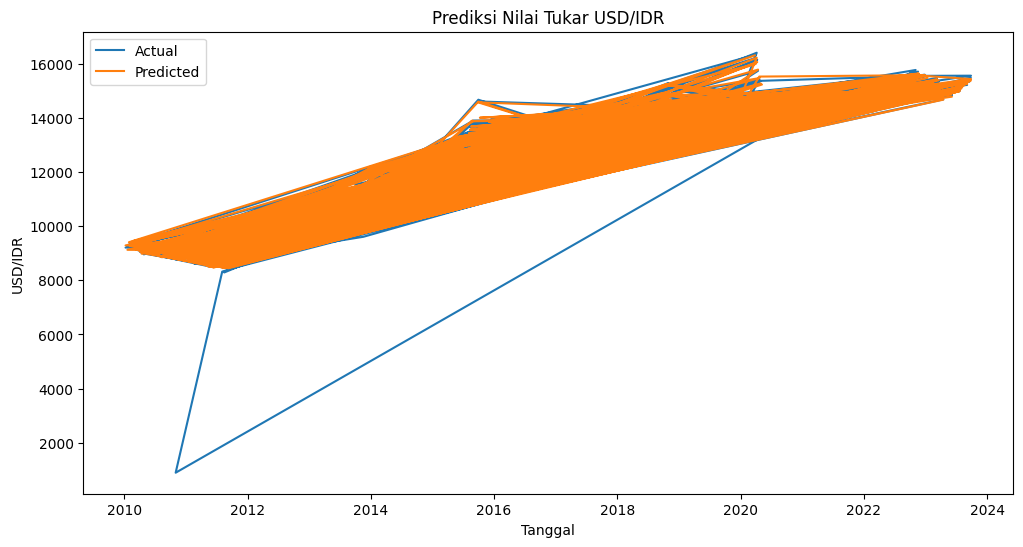

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title("Prediksi Nilai Tukar USD/IDR")
plt.xlabel("Tanggal")
plt.ylabel("USD/IDR")
plt.legend()
plt.show()